In [6]:
import numpy, pandas, conntility
import bluepysnap as snap
from scipy.spatial import distance
from scipy import sparse



fn_circ = "./data/circuit_config_multipop.json"
circ = snap.Circuit(fn_circ)

load_cfg = {"loading": {"base_target": "Mosaic",
                        "node_population": "S1nonbarrel_neurons",
                        "properties": ["x", "y", "z", "synapse_class"],
                        "atlas": [
                            {
                                "data": "./data/ss_fm.nrrd", 
                                "properties": ["ss_flat_x", "depth", "ss_flat_y"]
                            }
                        ]
                        },
            "grouping": [{"method": "group_by_grid", "columns": ["ss_flat_x", "ss_flat_y"], "args": [50]}]}
nrn_df = conntility.circuit_models.neuron_groups.load_group_filter(circ, load_cfg)
grid_locs = nrn_df.groupby(["grid-subtarget"])[["grid-x", "grid-y"]].apply("mean").iloc[1:]

In [10]:
def for_simulation(fn_sim, nrn_df, grid_locs):
    dt = 10.0
    dd = 50.0
    sim = snap.Simulation(fn_sim)
    spks = sim.spikes.get()
    spks_rv = spks.reset_index().set_index("gid")["t"]
    t_bins = numpy.arange(1000.0, sim.t_end + dt, dt)
    dbins = numpy.hstack([[0.1], numpy.arange(dd, 8000 + dd, dd)])

    nrn_fltr = nrn_df.set_index("gid")
    nrn_fltr = nrn_fltr.loc[nrn_fltr.index.intersection(spks_rv.index)].reset_index().set_index("grid-subtarget")

    tb = numpy.digitize(spks_rv.values, bins=t_bins)
    M = sparse.coo_matrix((numpy.ones_like(tb), (spks_rv.index.values, tb)), shape=(len(nrn_df) + 1, len(t_bins) + 1)).tocsr()

    vc = nrn_fltr.reset_index()["grid-subtarget"].value_counts()
    valid = (vc > 50) & (vc < 10000)
    nrn_use = nrn_fltr.loc[valid]

    H = nrn_use.groupby(["grid-subtarget"])["gid"].apply(lambda v: numpy.array(M[v, :].sum(axis=0))[0, 1:] / len(v))

    CC = numpy.corrcoef(numpy.vstack(H.values))
    D = distance.squareform(distance.pdist(grid_locs.loc[H.index].values))

    S = pandas.DataFrame({"CC": CC.flatten(), "dbins": numpy.digitize(D.flatten(), bins=dbins)})
    S = S.loc[S["dbins"] > 0]
    x = 0.5 * (dbins[:-1] + dbins[1:])
    S["distance"] = x[S["dbins"]]
    return S

In [24]:
import glob
import os

fn_root = "simulations/bb16bd9f-3d21-4a35-8296-d6aec4c55bf7/"
fns = glob.glob(fn_root + "/*/out.dat")
fns = [fn.replace("out.h5", "BlueConfig") for fn in fns]

S = dict([
    (os.path.split(os.path.split(fn)[0])[1], for_simulation(fn, nrn_df, grid_locs))
    for fn in fns
])

 2023-04-12 19:28:14,712: Have keys ({'desired_connected_fr_L6E', 'desired_unconnected_fr_L5I', 'desired_unconnected_fr_L23E', 'desired_unconnected_fr_L6I', 'desired_connected_fr_L1I', 'desired_connected_fr_L6I', 'desired_unconnected_fr_L23I', 'desired_unconnected_fr_L4I', 'depol_stdev_mean_ratio', 'desired_connected_proportion_of_invivo_frs', 'desired_unconnected_fr_L1I', 'desired_connected_fr_L4I', 'desired_connected_fr_L23E', 'desired_unconnected_fr_L6E', 'desired_connected_fr_L4E', 'desired_unconnected_fr_L4E', 'desired_connected_fr_L5E', 'desired_unconnected_fr_L5E', 'desired_connected_fr_L5I', 'desired_connected_fr_L23I'}) that are not defined for section: Run


Ignoring unknown Section type Conditions
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus


 2023-04-12 19:28:22,461: Have keys ({'desired_connected_fr_L6E', 'desired_unconnected_fr_L5I', 'desired_unconnected_fr_L23E', 'desired_unconnected_fr_L6I', 'desired_connected_fr_L1I', 'desired_connected_fr_L6I', 'desired_unconnected_fr_L23I', 'desired_unconnected_fr_L4I', 'depol_stdev_mean_ratio', 'desired_connected_proportion_of_invivo_frs', 'desired_unconnected_fr_L1I', 'desired_connected_fr_L4I', 'desired_connected_fr_L23E', 'desired_unconnected_fr_L6E', 'desired_connected_fr_L4E', 'desired_unconnected_fr_L4E', 'desired_connected_fr_L5E', 'desired_unconnected_fr_L5E', 'desired_connected_fr_L5I', 'desired_connected_fr_L23I'}) that are not defined for section: Run


Ignoring unknown Section type Conditions
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus


 2023-04-12 19:28:30,155: Have keys ({'desired_connected_fr_L6E', 'desired_unconnected_fr_L5I', 'desired_unconnected_fr_L23E', 'desired_unconnected_fr_L6I', 'desired_connected_fr_L1I', 'desired_connected_fr_L6I', 'desired_unconnected_fr_L23I', 'desired_unconnected_fr_L4I', 'depol_stdev_mean_ratio', 'desired_connected_proportion_of_invivo_frs', 'desired_unconnected_fr_L1I', 'desired_connected_fr_L4I', 'desired_connected_fr_L23E', 'desired_unconnected_fr_L6E', 'desired_connected_fr_L4E', 'desired_unconnected_fr_L4E', 'desired_connected_fr_L5E', 'desired_unconnected_fr_L5E', 'desired_connected_fr_L5I', 'desired_connected_fr_L23I'}) that are not defined for section: Run


Ignoring unknown Section type Conditions
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus
Ignoring unknown Section type Stimulus


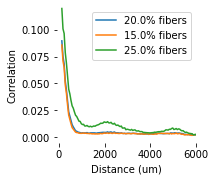

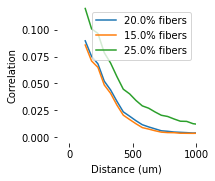

In [36]:
ax = plt.figure(figsize=[2.5, 2.5]).gca()
vpm_pct = [5.0, 10.0, 15.0, 20.0, 25.0]

for k, v in S.items():
    plt.plot(v.groupby("distance")["CC"].apply("mean"), label="{0}% fibers".format(vpm_pct[int(k)]))

ax.set_xlim([-100, 6000])
ax.set_ylim([-0.005, 0.121])

ax.set_xlabel("Distance (um)")
ax.set_ylabel("Correlation")
ax.set_frame_on(False)

plt.legend()

ax = plt.figure(figsize=[2.5, 2.5]).gca()

for k, v in S.items():
    plt.plot(v.groupby("distance")["CC"].apply("mean"), label="{0}% fibers".format(vpm_pct[int(k)]))

ax.set_xlim([-100, 1000])
ax.set_ylim([-0.005, 0.121])

ax.set_xlabel("Distance (um)")
ax.set_ylabel("Correlation")
ax.set_frame_on(False)

plt.legend()